In [25]:
import pandas as pd
from sklearn.model_selection import train_test_split
import numpy as np
import matplotlib.pyplot as plt
import statsmodels.api as sm
from sklearn.linear_model import LinearRegression, Lasso
from sklearn.model_selection import cross_val_score
from sklearn.metrics import mean_absolute_error
from sklearn.ensemble import RandomForestRegressor
from sklearn.model_selection import GridSearchCV


In [26]:
df= pd.read_csv("data.csv")


In [27]:
#choose columns

df_model = df[['Avg_Salary','Rating','Size','Type of ownership','Industry','Sector','Revenue','num_comp','Salary_Per_Hour','Employer Provdid ','Jop_Estate','Same_Location','Company_Age','Python','Spark','Aws','Excel','Job Title_Simp','seniority']]


In [28]:
#dummy variables
df_dum = pd.get_dummies(df_model)

In [29]:
#train and test split
X = df_dum.drop('Avg_Salary', axis =1)
y = df_dum.Avg_Salary.values
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)


In [30]:
X_sm = X = sm.add_constant(X)
model = sm.OLS(y,X_sm)
model.fit().summary()


<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                      y   R-squared:                       0.708
Model:                            OLS   Adj. R-squared:                  0.639
Method:                 Least Squares   F-statistic:                     10.39
Date:                Sat, 05 Aug 2023   Prob (F-statistic):           1.65e-95
Time:                        13:42:27   Log-Likelihood:                -3311.9
No. Observations:                 742   AIC:                             6906.
Df Residuals:                     601   BIC:                             7556.
Df Model:                         140                                         
Covariance Type:            nonrobust                                         
=====================================================================================================================
                                                        coef    std err          t      P>|t|      [0.025      0.975]
---------------------------------------------------------------------------------------------------------------------
const                                                44.9164      6.462      6.950      0.000      32.225      57.608
Rating                                                3.5137      1.926      1.825      0.069      -0.268       7.296
num_comp                                              2.2795      0.864      2.639      0.009       0.583       3.976
Salary_Per_Hour                                     -35.9422      9.086     -3.956      0.000     -53.786     -18.098
Employer Provdid                                     31.8211     11.465      2.775      0.006       9.304      54.338
Same_Location                                         2.3865      2.603      0.917      0.360      -2.726       7.499
Company_Age                                           0.0342      0.030      1.145      0.253      -0.024       0.093
Python                                                8.1987      2.517      3.257      0.001       3.255      13.142
Spark                                                -0.5013      2.905     -0.173      0.863      -6.206       5.204
Aws                                                   1.1164      2.704      0.413      0.680      -4.195       6.428
Excel                                                -0.5468      2.247     -0.243      0.808      -4.959       3.866
Size_-1                                              13.7780      8.615      1.599      0.110      -3.141      30.697
Size_1 to 50 employees                                1.2612      6.489      0.194      0.846     -11.483      14.005
Size_10000+ employees                                -2.2956      5.727     -0.401      0.689     -13.543       8.952
Size_1001 to 5000 employees                           6.2745      3.838      1.635      0.103      -1.263      13.812
Size_201 to 500 employees                             2.3786      3.860      0.616      0.538      -5.202       9.959
Size_5001 to 10000 employees                         -3.6300      5.417     -0.670      0.503     -14.268       7.008
Size_501 to 1000 employees                            2.0653      4.026      0.513      0.608      -5.841       9.971
Size_51 to 200 employees                              4.1925      4.402      0.952      0.341      -4.452      12.837
Size_Unknown                                         20.8918     13.968      1.496      0.135      -6.539      48.323
Type of ownership_-1                                 13.7780      8.615      1.599      0.110      -3.141      30.697
Type of ownership_College / University                6.9026     17.690      0.390      0.697     -27.840      41.645
Type of ownership_Company - Private                   8.8480      5.223      1.694      0.091      -1.410      19.106
Type of ownersh

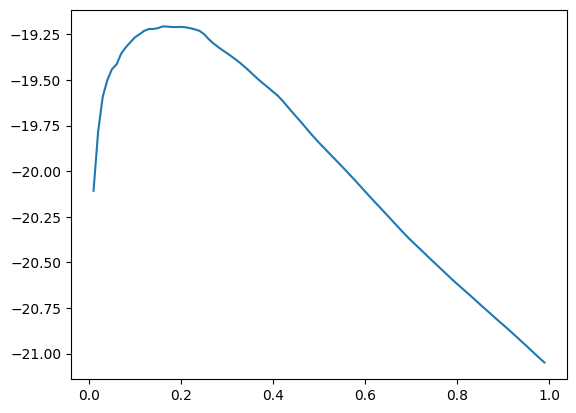

In [31]:
# lasso

alpha = []
error = []
#searching for best alpha
for i in range(1,100):
    alpha.append(i/100)
    lml = Lasso(alpha=(i/100))
    error.append(np.mean(cross_val_score(lml,X_train,y_train, scoring = 'neg_mean_absolute_error', cv= 3)))

plt.plot(alpha,error)

In [32]:
# seraching for best alpha with min error
max_error=max(error)
max_index=error.index(max_error)
alpha_number=alpha[max_index]
print("Maximum error:", max_error)
print("alpha_number:", alpha_number)

Maximum error: -19.206720399806866
alpha_number: 0.16


In [33]:
# lasso regression
lm_l = Lasso(alpha=0.16)
lm_l.fit(X_train,y_train)
np.mean(cross_val_score(lm_l,X_train,y_train, scoring = 'neg_mean_absolute_error', cv= 3))

-19.206720399806866

In [34]:
# random forest
rf = RandomForestRegressor()

np.mean(cross_val_score(rf,X_train,y_train,scoring = 'neg_mean_absolute_error', cv= 3))


-14.882662758198643

In [35]:



# Define the hyperparameter grid
param_grid = {
    'n_estimators': [10, 50, 100],
    'max_depth': [None, 5, 10],
    'min_samples_split': [2, 5, 10],
    'max_features': ['sqrt', 'log2', None]
}







In [36]:
#grid serche object
gs = GridSearchCV(rf,param_grid,scoring='neg_mean_absolute_error',cv=3)
gs.fit(X_train,y_train)

gs.best_score_
gs.best_estimator_

RandomForestRegressor(max_features=None, n_estimators=50)

In [37]:
# predict lasso
predict_lml = lm_l.predict(X_test)
predict_lml

array([111.02043354,  74.43049809, 113.56580796, 127.2880765 ,
       151.11047381, 129.83851554, 136.72243437,  43.49605631,
        58.83151459,  92.34555019, 148.6650973 ,  79.36010892,
       116.45800335, 123.92134236,  64.148614  , 131.98168379,
        68.65932902,  74.86915892, 103.01158638,  87.52304022,
        98.05267574, 113.65923742, 151.14080669, 108.73245019,
       149.1493019 , 101.79656538,  75.9393048 , 130.40999714,
        92.46889777, 104.30329758,  82.47756406,  69.96036527,
       136.59470911, 102.03268901,  94.88693201,  96.24259432,
        80.68674562,  99.39254599,  89.99563805, 120.52710403,
       157.18747903, 115.65647253, 103.42993235, 106.34289178,
       156.60716589,  95.44312566, 144.19548043, 116.41037669,
       131.91095145, 103.16459832, 121.00179631, 111.10208834,
       102.92867355, 101.76093257,  87.23347962, 122.89418563,
       103.42993235,  78.72409311, 157.18747903, 133.00386245,
       117.05937323,  98.99534844, 125.18478873, 133.50

In [38]:
# predict random forest
predict_rf=gs.best_estimator_.predict(X_test)
predict_rf

array([110.86      ,  52.64      , 148.73745238, 125.72666667,
       147.14666667, 132.44      , 151.66      ,  50.42      ,
        58.71      ,  63.03      , 160.00416667,  61.17      ,
       109.89      , 116.17333333, 106.01      , 138.34      ,
        61.5       ,  65.94      , 111.15      , 102.        ,
       115.86      , 150.2       , 148.33      , 106.855     ,
       139.75      , 107.69      ,  64.94      , 148.34      ,
       105.49      ,  99.41      ,  93.45      ,  53.85      ,
       122.72      , 105.44      , 100.09      ,  91.87      ,
        93.37      , 108.35666667,  67.35      , 118.93      ,
       230.83466667, 122.83      ,  92.715     , 100.24246934,
       154.915     ,  81.14      , 137.32      , 123.15      ,
       131.52      , 100.76      , 129.69      ,  80.7025    ,
        73.53      , 103.77      ,  80.7025    , 115.23      ,
        92.715     ,  68.97      , 230.83466667, 133.46257143,
       118.54833333,  91.71      , 103.85      , 140.00

In [39]:
# mean error for random forest
mean_absolute_error(y_test,predict_rf)


11.569398975558371

In [40]:
# mean error for lasso
mean_absolute_error(y_test,predict_lml)


19.582344113148412

In [41]:
#import it in pickle file
import pickle
pickl = {'model': gs.best_estimator_}
pickle.dump( pickl, open( 'model_file' + ".p", "wb" ) )

file_name = "model_file.p"
with open(file_name, 'rb') as pickled:
    data = pickle.load(pickled)
    model = data['model']

model.predict(np.array(list(X_test.iloc[1,:])).reshape(1,-1))[0]

list(X_test.iloc[1,:])

/usr/local/lib/python3.10/dist-packages/sklearn/base.py:439: UserWarning: X does not have valid feature names, but RandomForestRegressor was fitted with feature names
  warnings.warn(


[3.6,
 0.0,
 0.0,
 0.0,
 1.0,
 37.0,
 0.0,
 0.0,
 0.0,
 1.0,
 0.0,
 0.0,
 0.0,
 1.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 1.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 1.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 1.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 1.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 1.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 1.